In [1]:
import cirpy
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from gensim.models import Word2Vec
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from scipy.stats import pearsonr, spearmanr
from tqdm import tqdm

# Get the SMILES and IUPAC Format

In [4]:
name2csd = json.load(open('./data_c/name_to_csd.json'))
name2smile_csd = dict()
l = list(enumerate(name2csd.keys()))
for idx, nm in l:
    smile = cirpy.resolve(nm, 'smiles')
    if smile:
        name2smile_csd[nm] = (smile, name2csd[nm])
        print(smile)
    time.sleep(1)

CCC12CCCN3CCC4(C(CC1)Nc5ccccc45)C23
CNCC(O)c1ccc(O)c(O)c1
COc1cc(cc(OC)c1OC)[C@H]2[C@@H]3[C@H](COC3=O)Cc4cc5OCOc5cc24
O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c3ccc(O)c(O)c3
CN1[C@@H](CCC[C@@H]1CC(=O)c2ccccc2)C[C@H](O)c3ccccc3
NC[C@@H](O)c1ccc(O)c(O)c1
CCCCCn1cc(C(=O)C2C(C)(C)C2(C)C)c3ccccc13
OCc1ccccc1[N+]([O-])=O
c1ccc(cc1)\C=C\c2ccccc2
C[C@@H](C(O)=O)c1ccc(c(F)c1)c2ccccc2
COc1ccc2cc(ccc2c1)[C@H](C)C(O)=O


HTTPError: HTTP Error 500: INTERNAL SERVER ERROR

In [8]:
for idx, nm in l[21:]:
    smile = cirpy.resolve(nm, 'smiles')
    if smile:
        name2smile_csd[nm] = (smile, name2csd[nm])
        print(smile)
    time.sleep(1)

with open("name_to_smile.json", "w") as f:
    json.dump(name2smile_csd, f, indent=True)

c1ccc2c(c1)cccc2c3cccc4ccccc34
Oc1ccc2ccccc2c1c3c(O)ccc4ccccc34
c1ccc2c(c1)cccc2c3cccc4ccccc34
c1ccc(cc1)c2ccccc2
FCC(F)(F)F
OC(C(F)(F)F)C(F)(F)F
OC(C(F)(F)F)C(F)(F)F
Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl
CC(Cl)(Cl)Cl
FC(F)(F)CI
ClC(Cl)C(Cl)Cl
c1ccc(cc1)C2=C(c3ccccc3)[Si](c4ccccc4)(c5ccccc5)C(=C2c6ccccc6)c7ccccc7
ClCC(Cl)Cl
Clc1ccc(cc1)C(=C(Cl)Cl)c2ccc(Cl)cc2
CC(Cl)Cl
c1cc2ccnc3c4nccc5cccc(c(c1)c23)c45
ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl
Clc1ccc(Cl)c(Cl)c1Cl
Clc1cc(Cl)c(Cl)c(Cl)c1
N#Cc1c(n2c3ccccc3c4ccccc24)c(C#N)c(n5c6ccccc6c7ccccc57)c(n8c9ccccc9c%10ccccc8%10)c1n%11c%12ccccc%12c%13ccccc%11%13
O=C1CCCc2[nH]c3ccccc3c12
[nH]1ccnn1
ClCC(Cl)CCl
Brc1cc(Br)c(Br)cc1Br
N#Cc1cc(C#N)c(cc1C#N)C#N
c1nncnn1
[nH]1cncn1
S=C1N=CN=N1
Brc1ccc(Br)c(Br)c1
Clc1ccc(Cl)c(Cl)c1
Cc1sc(cc1C2=C(c3cc(sc3C)c4ccccc4)C(F)(F)C(F)(F)C2(F)F)c5ccccc5
C(CP(c1ccccc1)c2ccccc2)P(c3ccccc3)c4ccccc4
c1ccc(cc1)C#Cc2ccccc2C#Cc3ccccc3
NCCN
Brc1ccccc1Br
Clc1ccccc1Cl
ClCCCl
Ic1ccccc1I
Cc1ccccc1C
Cn1ccnc1C
NCCN
OCCO
O=C1C=Cc2ccccc2C1=O
Nc

KeyboardInterrupt: 

In [ ]:
name2smile = json.load(open('./name_to_smile.json'))
len(name2smile_csd.keys())

In [ ]:
name2mol = dict()
for nm in list(name2smile.keys()):
    sm = name2smile[nm][0]
    mol = Chem.MolFromSmiles(sm)
    mc = rdMolDescriptors.CalcMolFormula(mol)
    name2mol[nm] = mc

with open("name_to_mol.json", "w") as f:
    json.dump(name2mol, f, indent=True)

# Relocate the Chemistries

In [10]:
crystals = pd.read_csv('./data_c/entry_mention.csv')
crystals

,entries,mentions,csd_id
0,acetanilide,[2941],ACANIL
1,"2,6-Dimethylphenol",[157226],DMEPOL
2,UPC-33,[508171],METPAF
3,"1-Chloro-2,4-dinitrobenzene","[55124, 55125, 55126, 55127, 55128]",BENCLN
4,tetrahydrate,"[579884, 741350]",OBORUU
...,...,...,...
1441,benzo[e]pyrene,[99355],CEQGEL
1442,3-aminoflavone,[525087],MOVBOP
1443,azetidine,[946358],XATMOV
1444,MCPA,[112522],CMPHAA


In [11]:
D = pd.read_csv('./data_c/crystals_wdoi.csv')
D

,CSD ID,doi,journal,volume,year,first page,authors,doi link,ccdc number,chemical name,synonyms
0,AACANI10,10.1021/ja00749a020,Journal of the American Chemical Society,93,1971,5079,"D.O.Nielson, M.L.Larsen, R.D.Willett, J.I.Legg",https://doi.org/10.1021/ja00749a020,1100002,"Aqua-(1,5-diazacyclo-octane-N,N'-diacetato-O,O...",NaN
1,AACFAZ,10.3987/R-1978-08-1041,Heterocycles,9,1978,1041,"T.Kurihara, Y.Sakamoto, M.Mori, T.Sakakai",https://doi.org/10.3987/R-1978-08-1041,1100003,anti-anti-bis(2-o-Chlorophenyl-4-methoxy-5-oxo...,NaN
2,AACFAZ10,10.1107/S0108270183005156,"Acta Crystallographica,Section C: Crystal Stru...",39,1983,470,"T.Ishida, M.Inoue, K.Nasu, T.Kurihara",https://doi.org/10.1107/S0108270183005156,1100004,"N,N'-bis(3-Acetyl-4-(2-chlorophenyl)-4-hydroxy...",NaN
3,AACMAL,10.1016/S0022-328X(00)98076-8,Journal of Organometallic Chemistry,127,1977,403,"J.L.Atwood, W.E.Hunter, K.D.Crissinger",https://doi.org/10.1016/S0022-328X(00)98076-8,1100005,Tetramethylammonium acetato-trimethyl-aluminiu...,NaN
4,AACMHX10,10.1021/ja00828a009,Journal of the American Chemical Society,96,1974,6593,"F.P.van Remoortere, J.J.Flynn",https://doi.org/10.1021/ja00828a009,1100006,"α-Acetoxy-α,2-anti-diphenylmethylene-cyclohexane",NaN
...,...,...,...,...,...,...,...,...,...,...,...
1083536,ZZZQRO09,10.1107/S2053229620008281,Acta Crystallographica Section C: Structural C...,76,2020,706,"D.Gonzalez, J.T.Golab, A.J.Cigler, J.A.Kaduk",https://doi.org/10.1107/S2053229620008281,1320185,Dipotassium hydrogen citrate,"Dipotassium hydrogen 2-hydroxy-1,2,3-propanetr..."
1083537,ZZZQRO10,10.1107/S2053229620008281,Acta Crystallographica Section C: Structural C...,76,2020,706,"D.Gonzalez, J.T.Golab, A.J.Cigler, J.A.Kaduk",https://doi.org/10.1107/S2053229620008281,1832552,Di-potassium hydrogen citrate,NaN
1083538,ZZZSEA03,10.1021/acs.cgd.1c01329,Crystal Growth and Design,22,2022,1371,"B.Tyson, C.M.Pask, N.George, E.Simone",https://doi.org/10.1021/acs.cgd.1c01329,2114268,D-xylose,"oxane-2,3,4,5-tetrol"
1083539,ZZZUXA05,10.1107/S0365110X52000198,Acta Crystallographica [1948-1967],5,1952,93,"S.C.Abrahams, W.N.Lipscomb",https://doi.org/10.1107/S0365110X52000198,2132698,thiophene,NaN


In [12]:
w2v_md = Word2Vec.load('./models/pubmed.model')

In [15]:
target_names = crystals['entries'].values
target_names = np.unique(target_names)
D['chemical name L'] = D['chemical name'].str.lower()
D['synonyms L'] = D['synonyms'].str.lower()

In [ ]:
% % time
name2csd = dict()
for name in tqdm(target_names):
    csds = D[(D['chemical name L'] == name.lower()) | (D['synonyms L'] == name.lower())]['CSD ID'].values
    name2csd[name] = csds.tolist()

In [20]:
with open("name_to_csd.json", "w") as f:
    json.dump(name2csd, f, indent=True)

In [22]:
len(name2csd)

1443

In [23]:
name2smile_csd = dict()
l = list(enumerate(name2csd.keys()))
for idx, nm in l:
    smile = cirpy.resolve(nm, 'smiles')
    if smile:
        name2smile_csd[nm] = (smile, name2csd[nm])
        print(smile)
    time.sleep(1)

CCC12CCCN3CCC4(C(CC1)Nc5ccccc45)C23
CNCC(O)c1ccc(O)c(O)c1
O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c3ccc(O)c(O)c3
NC[C@@H](O)c1ccc(O)c(O)c1
COc1cc(cc(OC)c1OC)[C@H]2[C@@H]3[C@H](COC3=O)Cc4cc5OCOc5cc24
CN1[C@@H](CCC[C@@H]1CC(=O)c2ccccc2)C[C@H](O)c3ccccc3
CCCCCn1cc(C(=O)C2C(C)(C)C2(C)C)c3ccccc13
OCc1ccccc1[N+]([O-])=O
c1ccc(cc1)\C=C\c2ccccc2
C[C@@H](C(O)=O)c1ccc(c(F)c1)c2ccccc2
COc1ccc2cc(ccc2c1)[C@H](C)C(O)=O


HTTPError: HTTP Error 500: INTERNAL SERVER ERROR

In [25]:
for idx, nm in l[21:]:
    smile = cirpy.resolve(nm, 'smiles')
    if smile:
        name2smile_csd[nm] = (smile, name2csd[nm])
        print(smile)
    time.sleep(1)

with open("name_to_smile.json", "w") as f:
    json.dump(name2smile_csd, f, indent=True)

c1ccc2c(c1)cccc2c3cccc4ccccc34
c1ccc2c(c1)cccc2c3cccc4ccccc34
Oc1ccc2ccccc2c1c3c(O)ccc4ccccc34
c1ccc2c(c1)cccc2c3cccc4ccccc34
c1ccc(cc1)c2ccccc2
FCC(F)(F)F
OC(C(F)(F)F)C(F)(F)F
OC(C(F)(F)F)C(F)(F)F
CC(Cl)(Cl)Cl
Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl
FC(F)(F)CI
ClC(Cl)C(Cl)Cl
c1ccc(cc1)C2=C(c3ccccc3)[Si](c4ccccc4)(c5ccccc5)C(=C2c6ccccc6)c7ccccc7
ClCC(Cl)Cl
Clc1ccc(cc1)C(=C(Cl)Cl)c2ccc(Cl)cc2
CC(Cl)Cl
c1cc2ccnc3c4nccc5cccc(c(c1)c23)c45
ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl
Clc1ccc(Cl)c(Cl)c1Cl
Clc1cc(Cl)c(Cl)c(Cl)c1
N#Cc1c(n2c3ccccc3c4ccccc24)c(C#N)c(n5c6ccccc6c7ccccc57)c(n8c9ccccc9c%10ccccc8%10)c1n%11c%12ccccc%12c%13ccccc%11%13
O=C1CCCc2[nH]c3ccccc3c12
[nH]1ccnn1
ClCC(Cl)CCl
Brc1cc(Br)c(Br)cc1Br
N#Cc1cc(C#N)c(cc1C#N)C#N
c1nncnn1
[nH]1cncn1
S=C1N=CN=N1
Brc1ccc(Br)c(Br)c1
Clc1ccc(Cl)c(Cl)c1
Clc1ccccc1Cl
ClCCCl
NCCN
OCCO
O=C1C=Cc2ccccc2C1=O
Cc1sc(cc1C2=C(c3cc(sc3C)c4ccccc4)C(F)(F)C(F)(F)C2(F)F)c5ccccc5
C(CP(c1ccccc1)c2ccccc2)P(c3ccccc3)c4ccccc4
c1ccc(cc1)C#Cc2ccccc2C#Cc3ccccc3
NCCN
Brc1ccccc1Br
Clc

In [26]:
def get_euler_dist(v1, v2):
    vi = np.array(v1).reshape([-1])
    vj = np.array(v2).reshape([-1])
    return np.sqrt(np.sum(np.square(vi - vj)))


def get_cos_similar(v1, v2):
    vi = np.array(v1).reshape([-1])
    vj = np.array(v2).reshape([-1])

    num = float(np.dot(vi, vj))  # 向量点乘
    denom = np.linalg.norm(vi) * np.linalg.norm(vj)  # 求模长的乘积
    return (num / denom) if denom != 0 else 0

In [76]:
smile_embd = pd.read_csv('./smile_embedding.csv')
smile_embd

,iupac,smile,embd
0,(+)-aspidospermidine,CCC12CCCN3CCC4(C(CC1)Nc5ccccc45)C23,[-7.44335949e-01 9.23662633e-02 -3.57910395e-...
1,(-)-Adrenaline,CNCC(O)c1ccc(O)c(O)c1,[-8.14905405e-01 -2.59020120e-01 9.81947482e-...
2,(-)-Epicatechin,O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c3ccc(O)c(O)c3,[-7.76835263e-01 -5.64182363e-02 6.96076825e-...
3,(-)-Noradrenaline,NC[C@@H](O)c1ccc(O)c(O)c1,[-0.79306275 -0.2277208 -0.02243627 -0.283230...
4,(-)-deoxypodophyllotoxin,COc1cc(cc(OC)c1OC)[C@H]2[C@@H]3[C@H](COC3=O)Cc...,[-8.34411085e-01 1.37109548e-01 2.22313315e-...
...,...,...,...
991,viridicatin,OC1=C(c2ccccc2)c3ccccc3NC1=O,[-1.22181594e+00 -3.88474464e-01 1.42942384e-...
992,virosecurinine,O=C1OC23CC(C=CC2=C1)N4CCCCC34,[-7.39553794e-02 2.85954088e-01 2.40951285e-...
993,voacamine,CC[C@H]1C[C@@H]2CN3CCc4c([nH]c5cc([C@H]6C[C@@H...,[-7.72047281e-01 -5.36762737e-02 -2.30637938e-...
994,weddellite,O.O.[Ca++].[O-]C(=O)C([O-])=O,[-2.23173782e-01 5.28758690e-02 3.87791097e-...


In [77]:

for idx, i_row in smile_embd.iterrows():
    for jdx, j_row in smile_embd[idx + 1:].iterrows():
        if i_row['iupac'].lower() == j_row['iupac'].lower():
            print(idx, jdx, i_row['iupac'], j_row['iupac'])
            smile_embd.drop(index=jdx, inplace=True)
smile_embd

11 14 1,1'-Binaphthyl 1,1'-binaphthyl
42 52 1,2-Dichlorobenzene 1,2-dichlorobenzene
61 69 1,3,5-Trinitrobenzene 1,3,5-trinitrobenzene
169 175 2,4,6-Trinitrophenol 2,4,6-trinitrophenol
226 261 2-Methyl-1,4-naphthoquinone 2-methyl-1,4-naphthoquinone
231 265 2-Nitrophenol 2-nitrophenol
233 270 2-Pyridone 2-pyridone
234 271 2-Thiouracil 2-thiouracil
340 369 4-Nitroaniline 4-nitroaniline
387 403 5-Bromouracil 5-bromouracil
389 405 5-Chlorouracil 5-chlorouracil


,iupac,smile,embd
0,(+)-aspidospermidine,CCC12CCCN3CCC4(C(CC1)Nc5ccccc45)C23,[-7.44335949e-01 9.23662633e-02 -3.57910395e-...
1,(-)-Adrenaline,CNCC(O)c1ccc(O)c(O)c1,[-8.14905405e-01 -2.59020120e-01 9.81947482e-...
2,(-)-Epicatechin,O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c3ccc(O)c(O)c3,[-7.76835263e-01 -5.64182363e-02 6.96076825e-...
3,(-)-Noradrenaline,NC[C@@H](O)c1ccc(O)c(O)c1,[-0.79306275 -0.2277208 -0.02243627 -0.283230...
4,(-)-deoxypodophyllotoxin,COc1cc(cc(OC)c1OC)[C@H]2[C@@H]3[C@H](COC3=O)Cc...,[-8.34411085e-01 1.37109548e-01 2.22313315e-...
...,...,...,...
991,viridicatin,OC1=C(c2ccccc2)c3ccccc3NC1=O,[-1.22181594e+00 -3.88474464e-01 1.42942384e-...
992,virosecurinine,O=C1OC23CC(C=CC2=C1)N4CCCCC34,[-7.39553794e-02 2.85954088e-01 2.40951285e-...
993,voacamine,CC[C@H]1C[C@@H]2CN3CCc4c([nH]c5cc([C@H]6C[C@@H...,[-7.72047281e-01 -5.36762737e-02 -2.30637938e-...
994,weddellite,O.O.[Ca++].[O-]C(=O)C([O-])=O,[-2.23173782e-01 5.28758690e-02 3.87791097e-...


In [82]:
%%time
nm = list(smile_embd['iupac'])

str_df = pd.DataFrame(columns=nm, index=nm)
sem_df = pd.DataFrame(columns=nm, index=nm)

for i, name in tqdm(enumerate(nm)):
    semvec1 = w2v_md.wv[name]
    strvec1 = [float(i) for i in smile_embd['embd'].iloc[i][1:-1].split()]
    for j in range(i):
        strvec2 = [float(i) for i in smile_embd['embd'].iloc[j][1:-1].split()]
        sem_cos = get_cos_similar(semvec1, w2v_md.wv[nm[j]])
        str_euler = get_euler_dist(strvec1, strvec2)

        str_df.iloc[i, j] = str_euler
        str_df.iloc[j, i] = str_euler
        sem_df.iloc[i, j] = sem_cos
        sem_df.iloc[j, i] = sem_cos
sem_df

985it [02:57,  5.54it/s]

CPU times: user 2min 55s, sys: 4.36 s, total: 2min 59s
Wall time: 2min 57s


,(+)-aspidospermidine,(-)-Adrenaline,(-)-Epicatechin,(-)-Noradrenaline,(-)-deoxypodophyllotoxin,(-)-lobeline,"(1-pentyl-1H-indol-3-yl)(2,2,3,3-tetramethylcyclopropyl)methanone",(2-nitrophenyl)methanol,(E)-stilbene,(R)-flurbiprofen,...,uscharin,uzarigenin,vardenafil,viomellein,vioxanthin,viridicatin,virosecurinine,voacamine,weddellite,xylitol
(+)-aspidospermidine,NaN,0.13574,0.122931,0.053811,0.277617,0.326956,0.259929,0.461148,0.520049,0.149164,...,0.152964,0.315971,0.062552,0.161389,0.258065,0.47974,0.314235,0.202532,0.06166,0.122914
(-)-Adrenaline,0.13574,NaN,0.370963,0.701567,0.116146,0.327963,0.116786,0.106885,0.15475,0.082123,...,0.124069,0.252192,0.26908,0.134941,0.20071,0.102835,0.150677,0.234647,0.153577,0.176761
(-)-Epicatechin,0.122931,0.370963,NaN,0.3042,0.463608,0.199425,0.129609,0.211041,0.282092,0.241821,...,0.343242,0.361132,0.257231,0.201768,0.416596,0.172814,0.272643,0.407197,0.091344,0.277961
(-)-Noradrenaline,0.053811,0.701567,0.3042,NaN,0.07541,0.383493,0.171362,0.159713,0.164313,0.093195,...,0.177159,0.194967,0.305414,0.067978,0.132591,0.066168,0.11382,0.18257,0.090039,0.128651
(-)-deoxypodophyllotoxin,0.277617,0.116146,0.463608,0.07541,NaN,0.234451,0.30692,0.229022,0.302793,0.105796,...,0.488712,0.555794,0.086158,0.327615,0.477644,0.328118,0.533088,0.558665,0.143889,0.202731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
viridicatin,0.47974,0.102835,0.172814,0.066168,0.328118,0.291813,0.314112,0.402843,0.434918,0.11107,...,0.229819,0.253604,0.075147,0.441098,0.2894,NaN,0.308742,0.327441,0.165659,0.195952
virosecurinine,0.314235,0.150677,0.272643,0.11382,0.533088,0.305937,0.244431,0.197288,0.337855,0.155322,...,0.397423,0.36667,0.080336,0.184642,0.320391,0.308742,NaN,0.485393,0.105657,0.121934
voacamine,0.202532,0.234647,0.407197,0.18257,0.558665,0.30264,0.200591,0.229827,0.236051,0.08952,...,0.34534,0.459826,0.140997,0.228117,0.388389,0.327441,0.485393,NaN,0.214079,0.117651
weddellite,0.06166,0.153577,0.091344,0.090039,0.143889,0.06474,0.101354,0.107365,0.167568,0.068709,...,0.132544,0.121426,0.050038,0.189474,0.058796,0.165659,0.105657,0.214079,NaN,0.241779


In [83]:
str_df

,(+)-aspidospermidine,(-)-Adrenaline,(-)-Epicatechin,(-)-Noradrenaline,(-)-deoxypodophyllotoxin,(-)-lobeline,"(1-pentyl-1H-indol-3-yl)(2,2,3,3-tetramethylcyclopropyl)methanone",(2-nitrophenyl)methanol,(E)-stilbene,(R)-flurbiprofen,...,uscharin,uzarigenin,vardenafil,viomellein,vioxanthin,viridicatin,virosecurinine,voacamine,weddellite,xylitol
(+)-aspidospermidine,NaN,9.521119,8.559914,9.247758,7.69176,8.019867,8.490956,9.997984,11.607735,9.163172,...,10.202784,8.913634,8.411148,7.74249,7.851865,9.427591,7.213657,7.768015,12.11053,12.108678
(-)-Adrenaline,9.521119,NaN,6.308154,4.531867,7.625947,7.216839,7.562386,7.056217,9.300086,6.259884,...,11.05146,11.287014,7.57124,7.075377,6.85924,7.528252,11.604494,8.878486,11.302586,11.094945
(-)-Epicatechin,8.559914,6.308154,NaN,4.285262,4.285975,4.734868,7.402537,6.782781,8.230165,4.686544,...,8.320379,10.930208,7.296711,4.223209,3.301838,6.684158,10.45844,5.933395,10.399346,9.582077
(-)-Noradrenaline,9.247758,4.531867,4.285262,NaN,5.991631,5.416031,7.55335,6.284152,9.519589,4.790722,...,9.016113,10.907166,7.26691,5.697938,5.500231,7.857179,10.850238,6.941771,9.976567,8.685453
(-)-deoxypodophyllotoxin,7.69176,7.625947,4.285975,5.991631,NaN,4.779426,6.769726,7.584897,9.691485,6.22772,...,6.896179,9.476364,6.468907,3.903847,4.237501,7.78621,8.957617,4.718441,9.94966,8.980953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
viridicatin,9.427591,7.528252,6.684158,7.857179,7.78621,7.516877,8.401924,7.734311,5.292489,5.93739,...,12.729813,13.249123,9.142785,7.66872,6.589601,NaN,12.687981,9.57142,13.161611,14.141193
virosecurinine,7.213657,11.604494,10.45844,10.850238,8.957617,10.054039,10.113055,11.832503,15.075411,11.892602,...,9.328811,8.416881,9.603984,9.086765,10.110773,12.687981,NaN,9.256321,11.300672,10.973194
voacamine,7.768015,8.878486,5.933395,6.941771,4.718441,4.983415,7.572397,8.889037,11.320134,7.331448,...,5.320805,9.458002,6.685321,4.995966,5.513742,9.57142,9.256321,NaN,9.937644,8.271614
weddellite,12.11053,11.302586,10.399346,9.976567,9.94966,10.292612,10.991176,9.667334,14.996828,10.99894,...,10.219991,11.341194,10.397179,10.033882,10.809008,13.161611,11.300672,9.937644,NaN,9.643383


In [39]:
sem_df.to_csv('./sementic_df.csv')
str_df.to_csv('./structural_df.csv')

In [92]:
def get_scatter(sem_df, str_df, threshod=10, getplt=False):
    nm = list(sem_df.columns)
    nm_thre = [name for name in nm if w2v_md.wv.vocab[name].count > threshod]
    op_sem_df = sem_df.loc[nm_thre, nm_thre]
    op_str_df = str_df.loc[nm_thre, nm_thre]
    X = []
    y = []
    for i in range(len(op_sem_df)):
        for j in range(i - 1):
            X.append(op_str_df.iloc[i, j])
            y.append(op_sem_df.iloc[i, j])

    sp = spearmanr(X, y)
    pr = pearsonr(X, y)
    if getplt:
        plt.title("Threshod {} distances\nCount of Samples: {}".format(threshod, len(y)))
        plt.ylabel("Semantic Cosine Similarity")
        plt.xlabel("Structural Distance")
        plt.scatter(X, y)
        plt.show()
        print(sp)
        print(pr)

    return sp, pr, len(nm_thre)

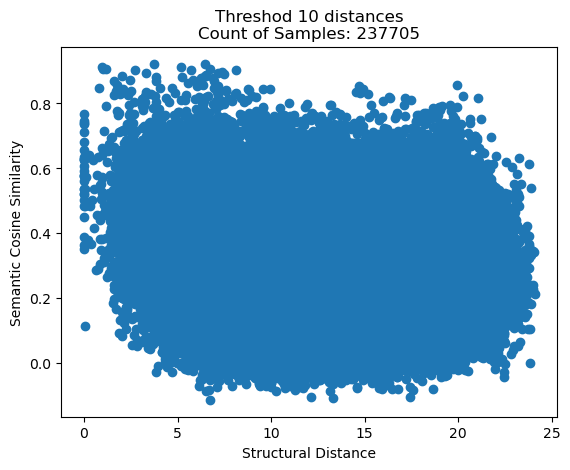

SpearmanrResult(correlation=-0.04366279729661935, pvalue=1.1887473950352e-100)
(-0.041325213709957315, 2.354636684260655e-90)


In [85]:
res = get_scatter(sem_df, str_df, threshod=10, getplt=True)

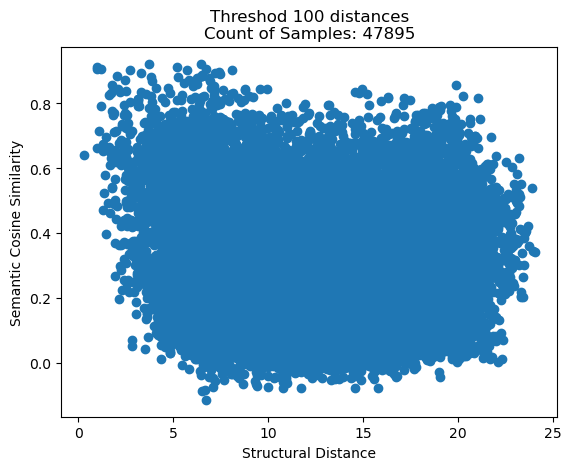

SpearmanrResult(correlation=-0.047184731845504674, pvalue=5.05868267906589e-25)
(-0.0392985859897174, 7.727717423174236e-18)


In [86]:
res = get_scatter(sem_df, str_df, threshod=100, getplt=True)

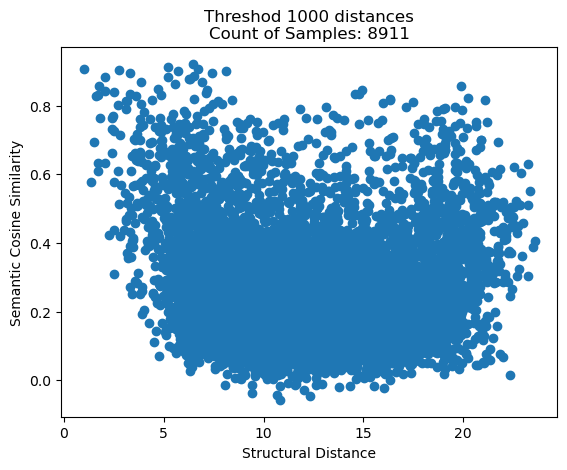

SpearmanrResult(correlation=-0.11503093027626882, pvalue=1.2398941726767148e-27)
(-0.11583016990612219, 5.353685007410461e-28)


In [87]:
res = get_scatter(sem_df, str_df, threshod=1000, getplt=True)

In [93]:
%%time
thresholds = np.arange(0, 10000, 10)
sp_coefs = np.zeros(len(thresholds))
sp_pvals = np.zeros(len(thresholds))
pr_coefs = np.zeros(len(thresholds))
pr_pvals = np.zeros(len(thresholds))
nrows = np.zeros(len(thresholds))
for i, thr in tqdm(list(enumerate(thresholds))):
    res = get_scatter(sem_df, str_df, threshod=thr)
    sp_coefs[i] = res[0][0]
    sp_pvals[i] = np.log(res[0][1]) if res[0][1] > 0 else np.nan
    pr_coefs[i] = res[1][0]
    pr_pvals[i] = np.log(res[1][1]) if res[1][1] > 0 else np.nan
    nrows[i] = res[2]

100%|██████████| 1000/1000 [03:16<00:00,  5.09it/s]

CPU times: user 4min 49s, sys: 28.4 s, total: 5min 17s
Wall time: 3min 16s


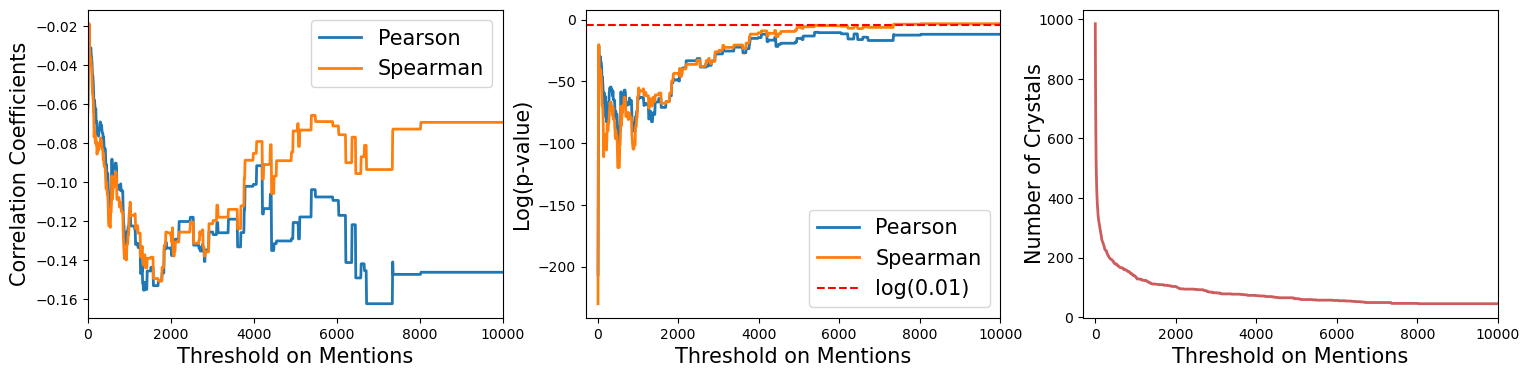

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].plot(thresholds, pr_coefs, lw=2, label='Pearson')
axes[0].plot(thresholds, sp_coefs, lw=2, label='Spearman')
axes[0].set_xlim([0, 10000])
axes[0].set_ylabel('Correlation Coefficients', fontsize=15)
axes[0].set_xlabel('Threshold on Mentions', fontsize=15)
axes[0].legend(fontsize=15, loc=1)

axes[1].plot(thresholds, pr_pvals, lw=2, label='Pearson')
axes[1].plot(thresholds, sp_pvals, lw=2, label='Spearman')
axes[1].axhline(y=np.log(0.01), color='r', ls='--', label='log(0.01)')
axes[1].set_xlim([-300, 10000])
axes[1].set_ylabel('Log(p-value)', fontsize=15)
axes[1].set_xlabel('Threshold on Mentions', fontsize=15)
axes[1].legend(fontsize=15, loc=4)

axes[2].plot(thresholds, nrows, lw=2, color='indianred', label='No. Columns')
axes[2].set_xlim([-300, 10000])
axes[2].set_ylabel('Number of Crystals', fontsize=15, labelpad=-5)
axes[2].set_xlabel('Threshold on Mentions', fontsize=15)

plt.subplots_adjust(right=1.3)